In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.linear_model import LinearRegression
from linreg_gd import LinearRegressionUsingGD

np.random.seed(0)

In [2]:
n_train = 500
n_test = 50

x_train = np.stack((np.random.rand(n_train), np.ones(n_train)), axis=1)
y_train = np.stack((2 + 3 * x_train[:, 0] + np.random.rand(n_train),), axis=1)
print(x_train.shape, y_train.shape)

(500, 2) (500, 1)


In [3]:
x_test = np.stack((np.random.rand(n_test), np.ones(n_test)), axis=1)
y_test = np.stack((2 + 3 * x_test[:, 0] + np.random.rand(n_test),), axis=1)
print(x_test.shape, y_test.shape)

(50, 2) (50, 1)


In [4]:
model = LinearRegressionUsingGD()

model.fit(x_train, y_train)

In [5]:
y_pred = model.predict(x_test)

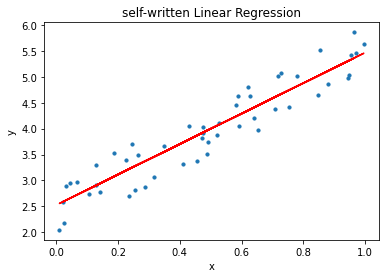

In [6]:
plt.scatter(x_test[:, 0], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('self-written Linear Regression')

# predicted values
plt.plot(x_test[:, 0], y_pred, color='r')
plt.show()

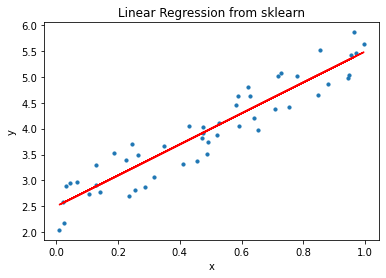

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.scatter(x_test[:, 0], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression from sklearn')

# predicted values
plt.plot(x_test[:, 0], y_pred, color='r')
plt.show()